In [156]:
import mysql.connector
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

In [129]:
connection = mysql.connector.connect(host='localhost', 
                                     database='integrated_data', 
                                     user='lanang_afkaar', 
                                     password='1q2w3e4r5t')

In [130]:
sql_select_Query = "SELECT * FROM salary_and_employee_perfomances_2020"
cursor = connection.cursor()
cursor.execute(sql_select_Query)

In [131]:
records = cursor.fetchall()
print("Total number of rows in table: ", cursor.rowcount)

Total number of rows in table:  311


In [132]:
df_employee = pd.DataFrame(list(records), columns=['Name', 'Employee_ID', 
                                          'Marital_ID', 'MaritalStatus_ID', 'Marital_Description', 
                                          'Gender_ID', 'Gender', 
                                          'Department_ID', 'Department', 
                                          'Position_ID', 'Position',
                                          'Productivity_Rate_in_a_year', 'Salary'])
df_employee

,Name,Employee_ID,Marital_ID,MaritalStatus_ID,Marital_Description,Gender_ID,Gender,Department_ID,Department,Position_ID,Position,Productivity_Rate_in_a_year,Salary
0,"Adinolfi, Wilson K",10026,0,0,Single,1,M,5,Production,19,Production Technician I,1.126027397,62506
1,"Ait Sidi, Karthikeyan",10084,1,1,Married,1,M,3,IT/IS,27,Sr. DBA,1.335616438,104437
2,"Akinkuolie, Sarah",10196,1,1,Married,0,F,5,Production,20,Production Technician II,1.476712329,64955
3,"Alagbe,Trina",10088,1,1,Married,0,F,5,Production,19,Production Technician I,1.332876712,64991
4,"Anderson, Carol",10069,0,2,Divorced,0,F,5,Production,19,Production Technician I,1.584931507,50825
...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,Single,1,M,5,Production,20,Production Technician II,1.491780822,65893
307,"Ybarra, Catherine",10301,0,0,Single,0,F,5,Production,19,Production Technician I,1.412328767,48513
308,"Zamora, Jennifer",10010,0,0,Single,0,F,3,IT/IS,6,CIO,1.342465753,220450
309,"Zhou, Julia",10043,0,0,Single,0,F,3,IT/IS,9,Data Analyst,1.383561644,89292


In [133]:
df_employee_dtype = df_employee.dtypes
df_employee_dtype

Name                           object
Employee_ID                     int64
Marital_ID                      int64
MaritalStatus_ID                int64
Marital_Description            object
Gender_ID                       int64
Gender                         object
Department_ID                   int64
Department                     object
Position_ID                     int64
Position                       object
Productivity_Rate_in_a_year    object
Salary                          int64
dtype: object

In [134]:
df_employee['Productivity_Rate_in_a_year'] = pd.to_numeric(df_employee['Productivity_Rate_in_a_year'],errors = 'coerce')
df_employee_dtype = df_employee.dtypes
df_employee_dtype

Name                            object
Employee_ID                      int64
Marital_ID                       int64
MaritalStatus_ID                 int64
Marital_Description             object
Gender_ID                        int64
Gender                          object
Department_ID                    int64
Department                      object
Position_ID                      int64
Position                        object
Productivity_Rate_in_a_year    float64
Salary                           int64
dtype: object

In [135]:
df_employee_described = df_employee.describe()
df_employee_described

,Employee_ID,Marital_ID,MaritalStatus_ID,Gender_ID,Department_ID,Position_ID,Productivity_Rate_in_a_year,Salary
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,4.610932,16.845659,1.477214,69020.684887
std,89.922189,0.490423,0.943239,0.496435,1.083487,6.223419,0.183001,25156.636930
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.852055,45046.000000
25%,10078.500000,0.000000,0.000000,0.000000,5.000000,18.000000,1.384247,55501.500000
50%,10156.000000,0.000000,1.000000,0.000000,5.000000,19.000000,1.482192,62810.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,20.000000,1.605479,72036.000000
max,10311.000000,1.000000,4.000000,1.000000,6.000000,30.000000,1.884932,250000.000000


10 1 50 10 208 32


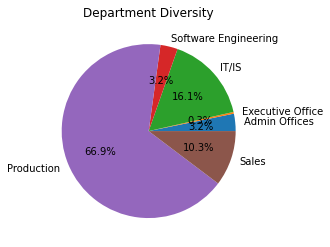

In [136]:
AdminOffices = 0
ExecutiveOffice = 0
IT_IS = 0
SoftwareEngineering = 0
Production = 0
Sales = 0

for department_id in df_employee['Department_ID']:
    if department_id == 1 :
        AdminOffices +=1
    elif department_id == 2 :
        ExecutiveOffice +=1
    elif department_id == 3 :
        IT_IS +=1
    elif department_id == 4 :
        SoftwareEngineering +=1
    elif department_id == 5 :
        Production +=1
    else:
        Sales +=1
print(AdminOffices, ExecutiveOffice, IT_IS, SoftwareEngineering, Production, Sales)

plot_department = [AdminOffices, ExecutiveOffice, IT_IS, SoftwareEngineering, Production, Sales]
labels_department = ['Admin Offices', 'Executive Office', 'IT/IS', 'Software Engineering', 'Production', 'Sales']

fig, ax = plt.subplots()
ax.pie(plot_department, labels = labels_department, autopct='%.1f%%')
ax.set_title('Department Diversity')
plt.show()

137 124 12 30


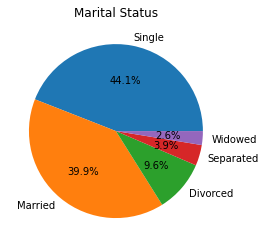

In [137]:
Single = 0
Married = 0
Divorced = 0
Separated = 0
Widowed = 0

for status in df_employee['MaritalStatus_ID']:
    if status == 0 :
        Single +=1
    elif status == 1:
        Married +=1
    elif status == 2:
        Divorced +=1
    elif status == 3:
        Separated +=1
    else:
        Widowed +=1
print(Single, Married, Separated, Divorced)

plot_marital = [Single, Married, Divorced, Separated, Widowed]
labels_marital = ['Single', 'Married', 'Divorced', 'Separated', 'Widowed']

fig, ax = plt.subplots()
ax.pie(plot_marital, labels = labels_marital, autopct='%.1f%%')
ax.set_title('Marital Status')
plt.show()

135 176


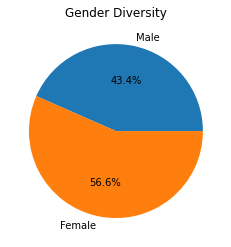

In [138]:
Male = 0
Female = 0
for gender in df_employee['Gender']:
    if gender == "F":
        Female += 1
    else:
        Male += 1
print(Male, Female)

plot_gender = [Male, Female]
labels_gender = ['Male', 'Female']

fig, ax = plt.subplots()
ax.pie(plot_gender, labels = labels_gender, autopct='%.1f%%')
ax.set_title('Gender Diversity')
plt.show()

308 3


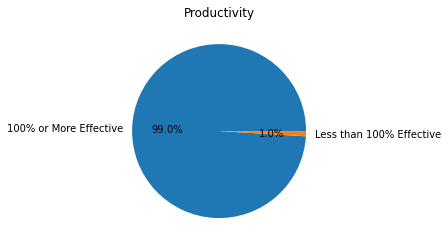

In [139]:
effective = 0
not_effective = 0

for productivity in df_employee['Productivity_Rate_in_a_year']:
    if productivity >= 1.0:
        effective += 1
    else: 
        not_effective += 1
        
print(effective, not_effective)

plot_productivity = [effective, not_effective]
label_productivity = ['100% or More Effective','Less than 100% Effective']

fig, ax = plt.subplots()
ax.pie(plot_productivity, labels = label_productivity, autopct='%.1f%%')
ax.set_title('Productivity')
plt.show()


NameError: name 'labels_mariteffective' is not defined

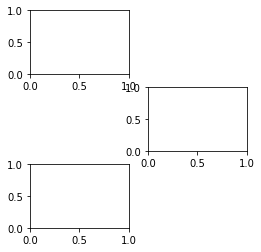

In [141]:
marital_plot = plt.subplot2grid((3, 3), (0, 0), )
department_plot = plt.subplot2grid((3, 3), (1, 1))
gender_plot = plt.subplot2grid((3, 3), (2, 0))

marital_plot.pie(plot_marital, labels = labels_mariteffective, autopct='%.1f%%')
marital_plot.set_title('Marital Status')

department_plot.pie(plot_department, labels = labels_department, autopct='%.1f%%')
department_plot.set_title('Department Diversity')

gender_plot.pie(plot_gender, labels = labels_gender, autopct='%.1f%%')
gender_plot.set_title('Gender Diversity')

plt.show()

In [142]:
df_predictSalary = df_employee.drop(['Name', 'Employee_ID', 'Marital_Description', 'Gender', 'Department', 'Position'], axis = 1)
df_predictSalary

,Marital_ID,MaritalStatus_ID,Gender_ID,Department_ID,Position_ID,Productivity_Rate_in_a_year,Salary
0,0,0,1,5,19,1.126027,62506
1,1,1,1,3,27,1.335616,104437
2,1,1,0,5,20,1.476712,64955
3,1,1,0,5,19,1.332877,64991
4,0,2,0,5,19,1.584932,50825
...,...,...,...,...,...,...,...
306,0,0,1,5,20,1.491781,65893
307,0,0,0,5,19,1.412329,48513
308,0,0,0,3,6,1.342466,220450
309,0,0,0,3,9,1.383562,89292


In [143]:
y = df_predictSalary.pop("Salary")
x = df_predictSalary.copy()

print(y)
print(x)

0       62506
1      104437
2       64955
3       64991
4       50825
        ...  
306     65893
307     48513
308    220450
309     89292
310     45046
Name: Salary, Length: 311, dtype: int64
     Marital_ID  MaritalStatus_ID  Gender_ID  Department_ID  Position_ID  \
0             0                 0          1              5           19   
1             1                 1          1              3           27   
2             1                 1          0              5           20   
3             1                 1          0              5           19   
4             0                 2          0              5           19   
..          ...               ...        ...            ...          ...   
306           0                 0          1              5           20   
307           0                 0          0              5           19   
308           0                 0          0              3            6   
309           0                 0          0  

In [144]:
x_array = np.array(x)
y_array = np.array(y)

In [145]:
print(x_array)
print(y_array)

[[ 0.          0.          1.          5.         19.          1.1260274 ]
 [ 1.          1.          1.          3.         27.          1.33561644]
 [ 1.          1.          0.          5.         20.          1.47671233]
 ...
 [ 0.          0.          0.          3.          6.          1.34246575]
 [ 0.          0.          0.          3.          9.          1.38356164]
 [ 0.          4.          0.          5.         19.          1.62739726]]
[ 62506 104437  64955  64991  50825  57568  95660  59365  47837  50178
  54670  47211  92328  58709  52505  57834  70131  59026 110000  53250
  51044  64919  62910  66441  57815 103613 106367  74312  53492  63000
  65288  64375  74326  63763  62162  77692  72640  93396  52846 100031
  71860  55315  61656 110929  54237  60380  66808  64786  64816  68678
  64066  59369  50373  63108  59144  68051 170500  63381  83552  56149
  92329  65729  85028  57583  56294  56991  55722 101199  61568  58275
  53189  96820  51259  59231  61584  46335  706

In [146]:
x_train, x_test, y_train, y_test = train_test_split(x_array, y_array, test_size=0.2, random_state=0)

In [147]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [148]:
print(regressor.intercept_)
print(regressor.coef_)

135777.16921580146
[  -750.68962308  -1644.55207559    302.38560634 -10107.49814841
   -540.37614355  -6321.50384103]


In [149]:
y_pred = regressor.predict(x_test)

In [150]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred

,Actual,Predicted
0,108987,72176.446892
1,63322,65001.857406
2,46430,63595.366515
3,70545,60836.171563
4,65902,65590.709819
...,...,...
58,69340,65088.453349
59,92329,80512.122212
60,62162,62519.319568
61,57954,61870.550193


In [163]:
PR = PolynomialFeatures(degree=1)
x_poly=PR.fit_transform(x_train)
PR.fit(x_poly,y_train)
LR2=LinearRegression()
LR2.fit(x_poly,y_train)
y_pred_Poly = LR2.predict(PR.fit_transform(x_test))

In [164]:
print(LR2.coef_)

[     0.           -750.68962308  -1644.55207559    302.38560634
 -10107.49814841   -540.37614355  -6321.50384103]


In [165]:
#df_coeff_poly = pd.DataFrame(LR2.coef_, x.columns, columns=['Coefficient'])
df_prediction_poly = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_Poly})


In [166]:
print(metrics.mean_absolute_error(y_test, y_pred_Poly))
print(metrics.mean_squared_error(y_test, y_pred_Poly))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_Poly)))
#print(df_coeff_poly)
print(df_prediction_poly)

12150.661307425593
365949375.5412632
19129.803332529667
    Actual     Predicted
0   108987  72176.446892
1    63322  65001.857406
2    46430  63595.366515
3    70545  60836.171563
4    65902  65590.709819
..     ...           ...
58   69340  65088.453349
59   92329  80512.122212
60   62162  62519.319568
61   57954  61870.550193
62   63763  67192.734768

[63 rows x 2 columns]


In [167]:
import tensorflow as tf

In [ ]:
model =  tf.